<a href="https://colab.research.google.com/github/sidhu2690/422/blob/main/05_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np

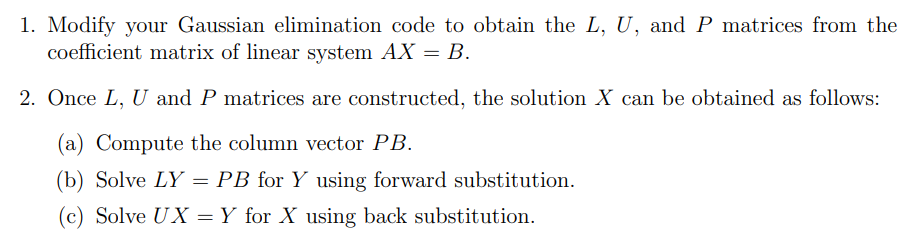

In [52]:
def forward_substitution(matrix):
  n = len(matrix)
  x = [0] * n
  for i in range(n):
    sum_known = 0
    for j in range(i):
      sum_known += matrix[i][j] * x[j]
    x[i] = (matrix[i][-1] -sum_known) / matrix[i][i]
  return x

def back_substitution(matrix):
  n = len(matrix)
  x = [0] * n
  for i in range(n-1, -1, -1):
    sum_known = 0
    for j in range(i+1, n):
      sum_known += matrix[i][j] * x[j]
    x[i] = (matrix[i][-1] - sum_known)/ matrix[i][i]
  return x

In [53]:
def lu_decomposition(matrix):
  A = np.array(matrix, dtype=float)
  n = len(matrix)
  P = np.eye(n)
  L = np.zeros((n, n))
  U = A.copy()

  for i in range(n):
    max_row = np.argmax(abs(U[i:, i])) + i

    if max_row != i:
      U[[max_row, i]] = U[[i, max_row]]
      P[[max_row, i]] = P[[i, max_row]]

      if i > 0:
        L[[i, max_row], :i] = L[[max_row, i], :i]

    for j in range(i+1, n):
      L[j, i] = U[j, i] / U[i, i]
      U[j] = U[j] - L[j, i] * U[i]

  for i in range(n):
    L[i, i] = 1

  return P, L, U

def solve_with_lu(A, B):
    P, L, U = lu_decomposition(A)
    B_perm = np.dot(P, B)
    y = forward_substitution(np.hstack([L, B_perm.reshape(-1,1)]))
    x = back_substitution(np.hstack([U, np.array(y).reshape(-1,1)]))
    return x, P, L, U

In [57]:
A = [[2, -1, -2],
     [-4, 6, 3],
     [-4, -2, 8]]

B = [ -2, 9, -5]

x, P, L, U = solve_with_lu(A, B)

np.allclose(np.dot(P, A), np.dot(L, U)), np.allclose(np.dot(A, x), B)

(True, True)

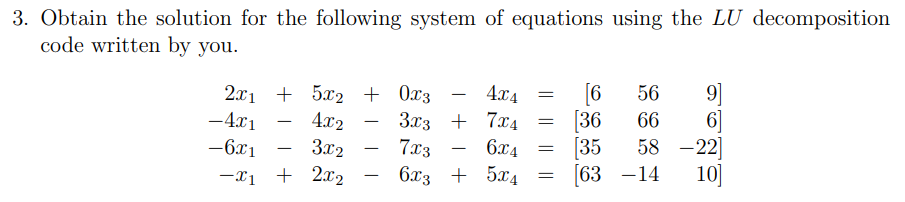

In [76]:
A = [[2, 5, 0, -4],
     [-4, -4,-3,7],
     [-6,-3,-7,-6],
     [-1, 2,-6, 5]]

B = [[6, 56, 9],
     [36, 66, 6],
     [35, 58, -22],
     [63, -14, 10]]

X = np.zeros_like(B, dtype=float)

for i, b in enumerate(np.array(B).T):
  x, _, _, _ = solve_with_lu(A, b)
  X[:, i] = x

print(X)


[[ -6.         -84.07581699  -5.84183007]
 [  6.          49.44836601   6.11633987]
 [ -5.          37.63921569   3.40784314]
 [  3.           5.77254902   2.4745098 ]]


In [77]:
np.linalg.solve(A, B)

array([[ -6.        , -84.07581699,  -5.84183007],
       [  6.        ,  49.44836601,   6.11633987],
       [ -5.        ,  37.63921569,   3.40784314],
       [  3.        ,   5.77254902,   2.4745098 ]])

eheh